In [70]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.fft import fft, ifft
from scipy.integrate import quad as integrate
import scipy 

[0.00000000e+00 2.03051465e-11 6.79502639e-06 5.14161555e-04
 4.65977204e-03 1.79029064e-02 4.45654628e-02 8.63031118e-02
 1.42538746e-01 2.11339037e-01 2.90093571e-01 3.75914817e-01
 4.65832858e-01 5.56867700e-01 6.46041011e-01 7.30372714e-01
 8.06903153e-01 8.72789354e-01 9.25542663e-01 9.63493686e-01
 9.86540921e-01 9.97011366e-01 9.99767371e-01 9.99998915e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.000000

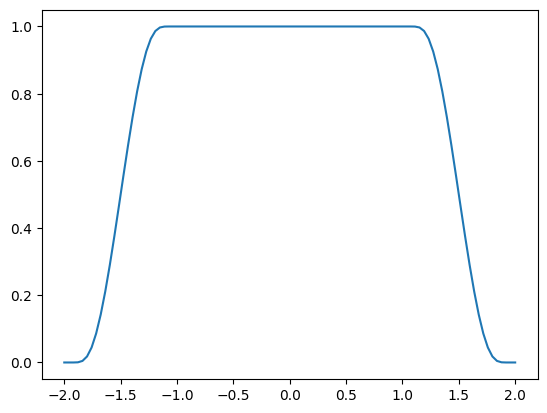

In [175]:
L = 2
chi = 1
psi = 2
x = np.linspace(-psi, psi, 100) 

# Asymptotic Fourier Coefficients for a C ∞ Bell
#(Smoothed-“Top-Hat”) & the Fourier Extension
#Problem
#John P. Boyd 1

#Eq. 2
def erflike(x, L):
    if x <= -1:
        return -1
    elif x >= 1:
        return  1
    else:
        return scipy.special.erf(L * x / np.sqrt(1 - x**2))

#Eq. 3
def ramp(x, L):
    return 0.5 * (1 + erflike(x, L))

#Eq. 5
def bell(x, L, chi, psi): 
#   Eq. 4
    Omega = (psi - chi) / 2
    if -psi <= x and x < -chi: 
        return ramp(+(x + chi + Omega)/Omega, L)
    elif -chi <= x and x < chi: 
        return 1
    else:
        return ramp(-(x - chi - Omega)/Omega, L)
    

y = np.array([bell(r, L, chi, psi) for r in x]) 
plt.plot(x, y)
print(y)

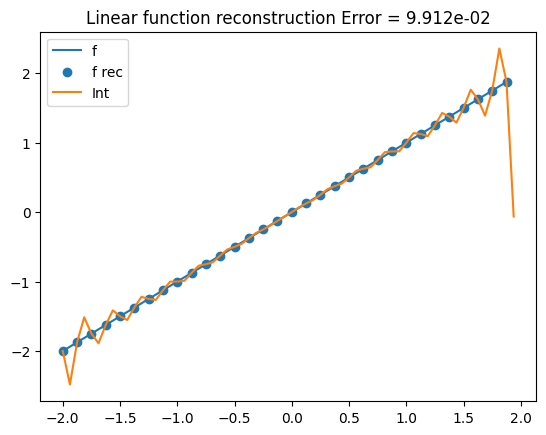

In [176]:
L  = 2 * np.pi
N  = 32
Ni = 64
x  = np.linspace(-psi, psi, N  + 1)[:-1]
xi = np.linspace(-psi, psi, Ni + 1)[:-1]

def getk(x): 
    k = np.arange(-len(x)/2, len(x)/2) / len(x)*2
    k = np.fft.ifftshift(k)
    return k 


def func(x): 
    return x

f    = func(x) 
fhat = fft(f, norm="forward")
#fhat[int(N/2)] = 0
Npad = int(Ni/2 - N/2) 
ft   = np.fft.fftshift(fhat)
fpad = np.concatenate([np.zeros(Npad), ft, np.zeros(Npad)])
fpad = np.fft.fftshift(fpad)
frec = ifft(fhat, norm="forward")
fint = ifft(fpad, norm="forward")
plt.title(f"Linear function reconstruction Error = {np.mean(np.abs(fint - func(xi))):3.3e}") 
plt.plot(x, f, label="f")
plt.scatter(x, frec, label="f rec")
plt.plot(xi, fint, label="Int")
plt.legend()
plt.show()

## The naive implementation

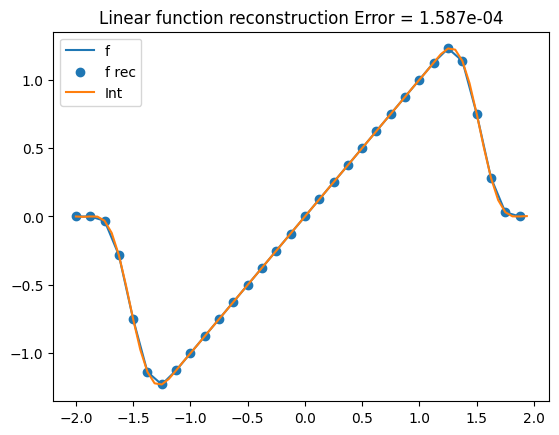

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


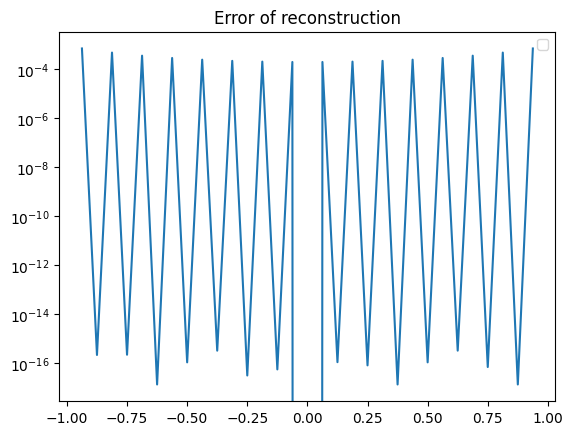

In [177]:
b = int(np.argwhere(xi>-chi)[0])
L = 0.911 * np.sqrt(1 - chi/psi) * np.sqrt(len(x)/2)
y    = np.array([bell(r, L, chi, psi) for r in x]) 
f    = func(x) * y
fhat = fft(f, norm="forward")
#fhat[int(N/2)] = 0
ft   = np.fft.fftshift(fhat)
fpad = np.concatenate([np.zeros(Npad), ft, np.zeros(Npad)])
fpad = np.fft.fftshift(fpad)
frec = ifft(fhat, norm="forward")
fint = ifft(fpad, norm="forward")
plt.title(f"Linear function reconstruction Error = {np.mean(np.abs(fint[b:-b] - func(xi)[b:-b])):3.3e}") 
plt.plot(x, f, label="f")
plt.scatter(x, frec, label="f rec")
plt.plot(xi, fint, label="Int")
plt.legend()
plt.show()


plt.title(f"Error of reconstruction") 
plt.yscale("log")
plt.plot(xi[b:-b+1], np.abs(fint[b:-b+1] - func(xi)[b:-b+1]))
plt.legend()
plt.show()

## The overlapped strategy

### With an analytical function

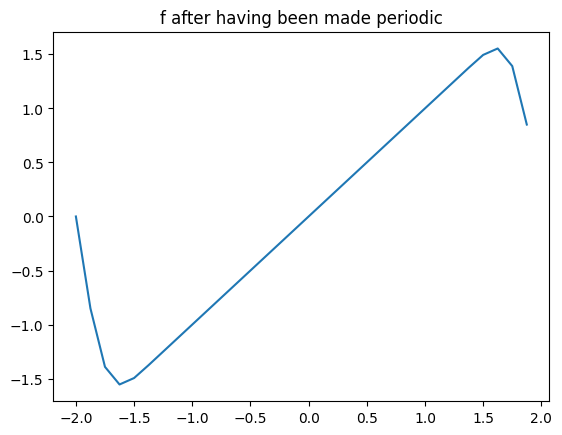

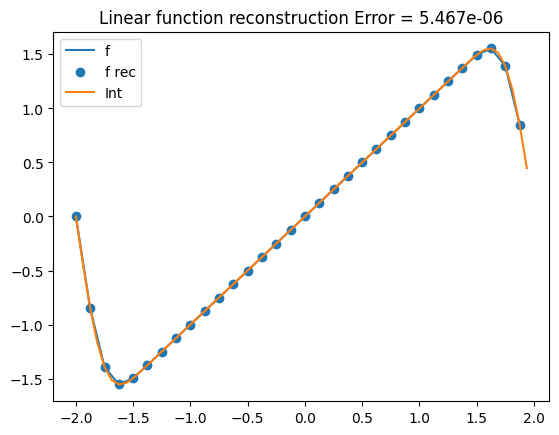

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


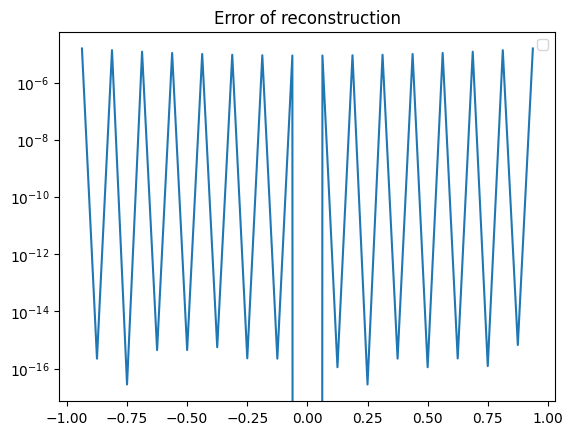

In [178]:
xs  = np.linspace(-psi, psi, N  + 1)[:-1]
xi  = np.linspace(-psi, psi, Ni + 1)[:-1]
L   = 1.3 * np.sqrt(1 - chi/psi) * np.sqrt(len(xs)/2)
b = int(np.argwhere(xi>-chi)[0])
f = np.zeros(xs.shape) 
for i, x in enumerate(xs): 
    Omega = (psi - chi) / 2
    if -psi <= x and x < -chi: 
        f[i] = bell(x, L, chi, 2 * psi - chi) * func(x) + bell(x + 2 * psi, L, chi, 2 * psi - chi) * func(x + 2 * psi)
    elif -chi <= x and x < chi: 
        f[i] = func(x) 
    else:
        f[i] = bell(x, L, chi, 2 * psi - chi) * func(x) + bell(x - 2 * psi, L, chi, 2 * psi - chi) * func(x - 2 * psi)
   
plt.title("f after having been made periodic")
plt.plot(xs, f) 
plt.show()  
fhat = fft(f, norm="forward")
#fhat[int(N/2)] = 0
Npad = int(Ni/2 - N/2) 
ft   = np.fft.fftshift(fhat)
fpad = np.concatenate([np.zeros(Npad), ft, np.zeros(Npad)])
fpad = np.fft.fftshift(fpad)
frec = ifft(fhat, norm="forward")
fint = ifft(fpad, norm="forward")
plt.title(f"Linear function reconstruction Error = {np.mean(np.abs(fint[b:-b] - func(xi)[b:-b])):3.3e}") 
plt.plot(xs, f, label="f")
plt.scatter(xs, frec, label="f rec")
plt.plot(xi, fint, label="Int")
plt.legend()
plt.show()


plt.title(f"Error of reconstruction") 
plt.yscale("log")
plt.plot(xi[b:-b+1], np.abs(fint[b:-b+1] - func(xi)[b:-b+1]))
plt.legend()
plt.show()

### With function values at discrete points

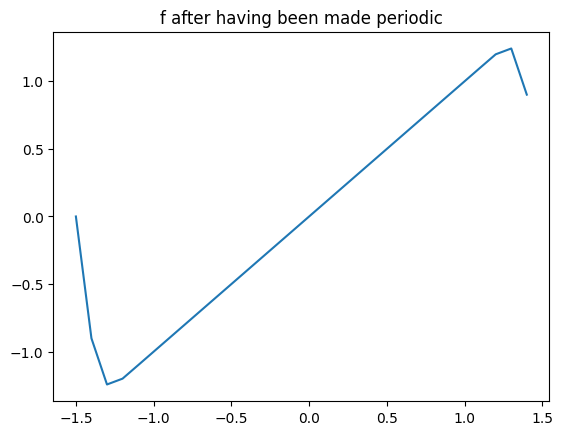

/home/calab912/.local/lib/python3.8/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/home/calab912/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


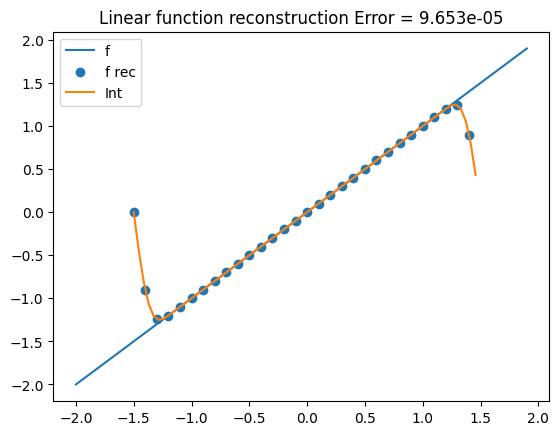

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


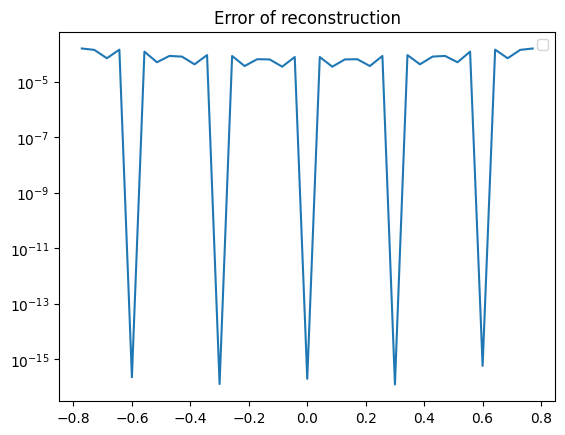

In [194]:
L  = 2 * np.pi
N  = 40
Ni = 80
x  = np.linspace(-psi, psi, N  + 1)[:-1]
chi = 1
psi = 1.5
xs  = np.linspace(-2*psi + chi, 2*psi - chi, N + 1)[:-1]
L   = 1.3 * np.sqrt(1 - chi/psi) * np.sqrt(len(xs)/2)
dx = xs[1] - xs[0]
twopsishift = int((2 * psi)/dx + 1)
chishift    = int((psi-chi)/dx)


f = xs
foverlapped  = np.zeros(f.shape)
for i, x in enumerate(xs): 
    Omega = (psi - chi) / 2
    if -psi <= x and x < -chi: 
        foverlapped[i] = bell(x, L, chi, 2 * psi - chi) * f[i] + bell(x + 2 * psi, L, chi, 2 * psi - chi) * f[i + twopsishift]
    elif -chi <= x and x <= chi: 
        foverlapped[i] = f[i]
    elif chi < x and x <= psi: 
        foverlapped[i] = bell(x, L, chi, 2 * psi - chi) * f[i] + bell(x - 2 * psi, L, chi, 2 * psi - chi) * f[i - twopsishift]

xinner = (-psi <= xs) * (xs < psi)
plt.title("f after having been made periodic")
plt.plot(xs[xinner], foverlapped[xinner]) 
plt.show() 
fhat = fft(foverlapped[xinner], norm="forward")
#fhat[int(N/2)] = 0
Npad = int(Ni/2 - N/2) 
ft   = np.fft.fftshift(fhat)
fpad = np.concatenate([np.zeros(Npad), ft, np.zeros(Npad)])
fpad = np.fft.fftshift(fpad)
frec = ifft(fhat, norm="forward")
fint = ifft(fpad, norm="forward")
xi =  np.linspace(xs[xinner][0], xs[xinner][-1]+ dx, len(fint) + 1)[:-1]

xivalid = (-chi <= xi) * (xi < chi)
plt.title(f"Linear function reconstruction Error = {np.mean(np.abs(fint[xivalid] - func(xi)[xivalid])):3.3e}") 
plt.plot   (xs, f, label="f")
plt.scatter(xs[xinner], frec, label="f rec")
plt.plot   (xi, fint, label="Int")
plt.legend()
plt.show()


plt.title(f"Error of reconstruction") 
plt.yscale("log")
plt.plot(xi[b:-b+1], np.abs(fint[b:-b+1] - func(xi)[b:-b+1]))
plt.legend()
plt.show()

Using the overlapped bell only gives a significant advantage if we can double the boundary size.